# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('website.csv')
websites.head()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  \
0  10/10/2015 18:21               None                          7   
1              None               None                         17   
2              None               None                          0   
3    7/10/1997 4:00    12/09/2013 0:45                         31   
4   12/05/1996 0:00    11/04/2017 0:00                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1                     7           4       1230                  17   
2                     0           0          0                   0   
3                    22           3       3812                  39   
4                     2           5       4278                  61   

   REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  \
0                  10              1153               832            9   
1                  19              1265              1230           17   
2                   0                 0                 0            0   
3                  37             18784              4380           39   
4                  62            129889              4586           61   

   DNS_QUERY_TIMES  Type  
0              2.0     1  
1              0.0     0  
2              0.0     0  
3              8.0     0  
4              4.0     0

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
#What the dataset looks like?
websites.head()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  \
0  10/10/2015 18:21               None                          7   
1              None               None                         17   
2              None               None                          0   
3    7/10/1997 4:00    12/09/2013 0:45                         31   
4   12/05/1996 0:00    11/04/2017 0:00                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1                     7           4       1230                  17   
2                     0           0          0                   0   
3                    22           3       3812                  39   
4                     2           5       4278                  61   

   REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  \
0                  10              1153               832            9   
1                  19              1265              1230           17   
2                   0                 0                 0            0   
3                  37             18784              4380           39   
4                  62            129889              4586           61   

   DNS_QUERY_TIMES  Type  
0              2.0     1  
1              0.0     0  
2              0.0     0  
3              8.0     0  
4              4.0     0

In [4]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [5]:
# What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
# Which columns contain the features of the websites?
#CHARTSET AND SERVER

In [7]:
# Your comment 
#Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

In [8]:
# Target column
websites['Type'].unique()

array([1, 0], dtype=int64)

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

C:\Users\manu2\AppData\Local\Temp/ipykernel_21244/2877797034.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

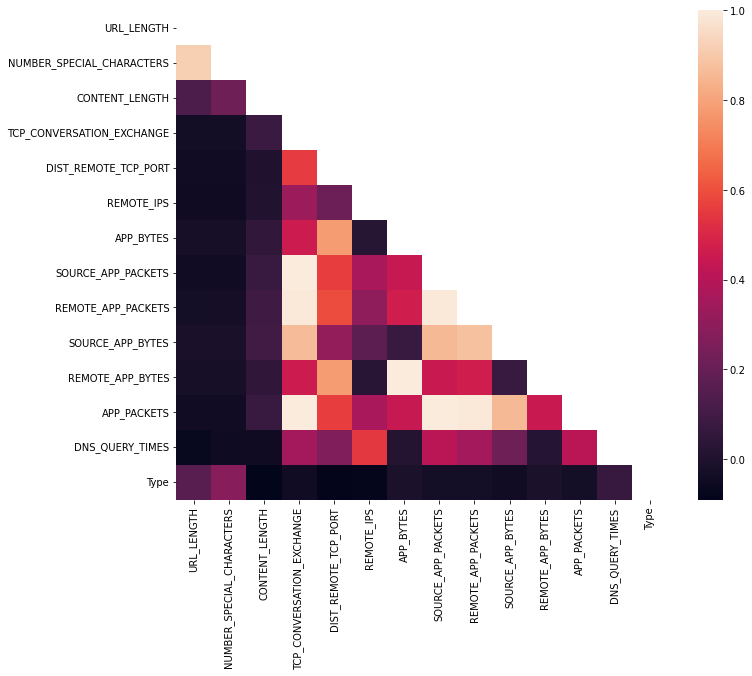

In [9]:
##1. You will create a correlation matrix using the numeric columns in the dataset.
corr = websites.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11, 9))

sns.heatmap(corr, mask=mask)

In [10]:
# Remove one of the columns of the pairs that have highest correlation'
# 1. URL-LENGTH
# 2. TCP_CONVERSATION_EXCHANGE
# 3. APP_PACKETS

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [11]:
# Create correlation matrix
corr_matrix = websites.corr().abs()
corr_matrix

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE    0.038407                   0.037459   
DIST_REMOTE_TCP_PORT         0.039839                   0.042619   
REMOTE_IPS                   0.046367                   0.047103   
APP_BYTES                    0.026446                   0.023914   
SOURCE_APP_PACKETS           0.042264                   0.040096   
REMOTE_APP_PACKETS           0.033779                   0.030597   
SOURCE_APP_BYTES             0.014857                   0.014376   
REMOTE_APP_BYTES             0.026686                   0.024098   
APP_PACKETS                  0.042264                   0.040096   
DNS_QUERY_TIMES              0.068582                   0.050048   
Type                         0.162104                   0.280897   

                           CONTENT_LENGTH  TCP_CONVERSATION_EXCHANGE  \
URL_LENGTH                       0.129745                   0.038407   
NUMBER_SPECIAL_CHARACTERS        0.214225                   0.037459   
CONTENT_LENGTH                   1.000000                   0.078451   
TCP_CONVERSATION_EXCHANGE        0.078451                   1.000000   
DIST_REMOTE_TCP_PORT             0.000381                   0.555188   
REMOTE_IPS                       0.004774                   0.331080   
APP_BYTES                        0.051202                   0.457320   
SOURCE_APP_PACKETS               0.074142                   0.997796   
REMOTE_APP_PACKETS               0.091077                   0.990848   
SOURCE_APP_BYTES                 0.100094                   0.865580   
REMOTE_APP_BYTES                 0.047595                   0.458702   
APP_PACKETS                      0.074142                   0.997796   
DNS_QUERY_TIMES                  0.045644                   0.349832   
Type                             0.090852                   0.040202   

                           DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
URL_LENGTH                             0.039839    0.046367   0.026446   
NUMBER_SPECIAL_CHARACTERS              0.042619    0.047103   0.023914   
CONTENT_LENGTH                         0.000381    0.004774   0.051202   
TCP_CONVERSATION_EXCHANGE              0.555188    0.331080   0.457320   
DIST_REMOTE_TCP_PORT                   1.000000    0.210188   0.780238   
REMOTE_IPS                             0.210188    1.000000   0.023126   
APP_BYTES                              0.780238    0.023126   1.000000   
SOURCE_APP_PACKETS                     0.558612    0.361104   0.445822   
REMOTE_APP_PACKETS                     0.591188    0.304683   0.468999   
SOURCE_APP_BYTES                       0.313359    0.171651   0.074464   
REMOTE_APP_BYTES                       0.781212    0.025324   0.999992   
APP_PACKETS                            0.558612    0.361104   0.445822   
DNS_QUERY_TIMES                        0.259942    0.548189   0.012221   
Type                                   0.082925    0.078783   0.011262   

                           SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
URL_LENGTH                           0.042264            0.033779   
NUMBER_SPECIAL_CHARACTERS            0.040096            0.030597   
CONTENT_LENGTH                       0.074142            0.091077   
TCP_CONVERSATION_EXCHANGE            0.997796            0.990848   
DIST_REMOTE_TCP_PORT                 0.558612            0.591188   
REMOTE_IPS                           0.361104            0.304683   
APP_BYTES                            0.445822            0.468999   
SOURCE_APP_PACKETS                   1.000000            0.989285   
REMOTE_APP_PACKETS                   0.989285            1.000000   
SOURCE_APP_BYTES                     0.857495            0.880555   
REMOTE_APP_BYTES                     0.447448          

In [12]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

C:\Users\manu2\AppData\Local\Temp/ipykernel_21244/2220268664.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [13]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [14]:
df_fixed = websites.drop(websites[to_drop], axis=1)

C:\Users\manu2\AppData\Local\Temp/ipykernel_21244/2158068114.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correl, dtype=np.bool)


<AxesSubplot:>

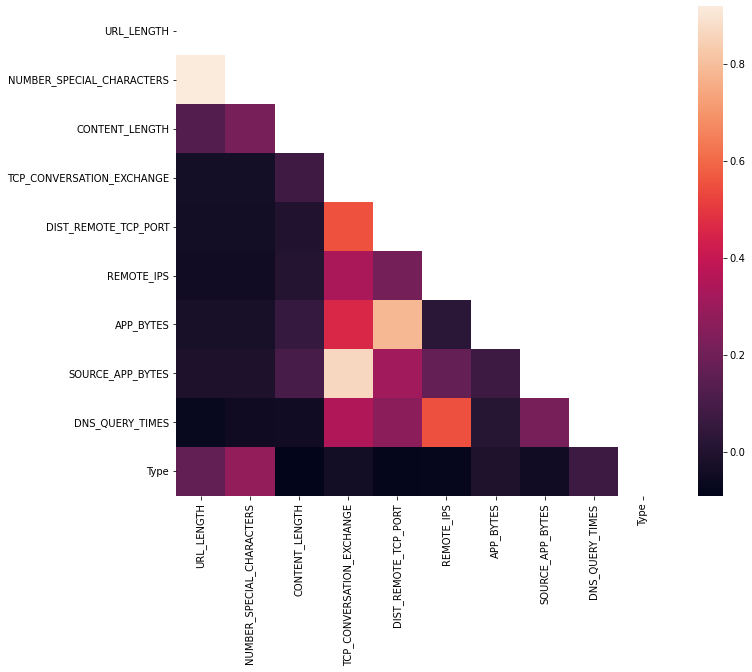

In [15]:
# Print heatmap again
# Correlation matrix
correl = df_fixed.corr()

# Heatmap
mask = np.zeros_like(correl, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11, 9))


sns.heatmap(correl, mask=mask)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [16]:
# Your code here
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [17]:
# Your code here
# Ratio of NaNs in the column CONTENT_LENGTH
websites['CONTENT_LENGTH'].isnull().sum()/websites['CONTENT_LENGTH'].shape

array([0.45592364])

In [18]:
# We delete the column CONTENT_LENGTH since almost 50% of the values are NaN
websites.drop('CONTENT_LENGTH', axis=1, inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [19]:
# Examine missing values in each column
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [20]:
# Let's look at the columns with NaNs left:
websites['DNS_QUERY_TIMES'].unique()

array([ 2.,  0.,  8.,  4., 10.,  6., 12., 14., 20.,  9., nan])

In [21]:
websites['SERVER'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

In [22]:
websites.dropna(inplace=True)

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [23]:
# Your code here
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [24]:
bad = ['Cyprus', 'us', 'se', 'United Kingdom', "[u'GB'; u'UK']"]
good =  ['CY', 'US', 'SE', 'UK', 'UK']

for i in range(len(good)):
    websites = websites.replace(bad[i], good[i])
    
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR',
       'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY',
       'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [25]:
# Your code here
countries = websites['WHOIS_COUNTRY'].value_counts()
countries

US      1105
None     306
CA        83
ES        63
AU        35
PA        21
GB        19
UK        16
JP        11
IN        10
CN        10
CZ         9
FR         9
CH         6
NL         6
KR         5
PH         4
ru         4
BS         4
AT         4
SE         4
KY         3
SC         3
BE         3
TR         3
DE         3
HK         3
UY         2
CY         2
RU         2
UA         2
IL         2
BR         2
NO         2
SI         2
KG         2
LU         1
LV         1
TH         1
PK         1
IT         1
UG         1
BY         1
AE         1
IE         1
Name: WHOIS_COUNTRY, dtype: int64

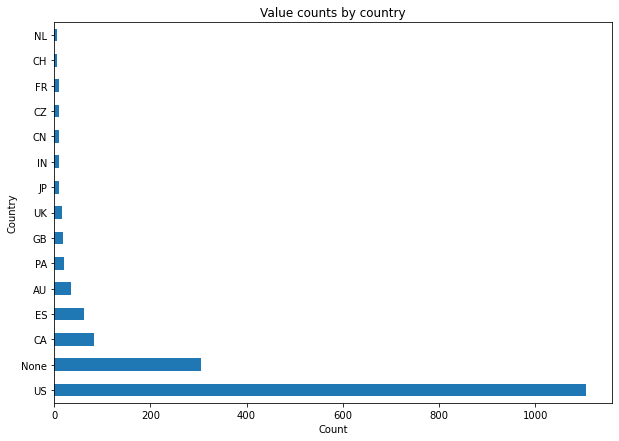

In [26]:
# Plotting count values by country

plt.figure(figsize=(10,7))
websites['WHOIS_COUNTRY'].value_counts()[:15].plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Value counts by country')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [27]:
# Your code here
# Replacing group 'None" with 'Other'
websites = websites.replace('None', 'OTHER')

# Replacing countries not in  the top 10
others = []
for i in range(len(websites.WHOIS_COUNTRY.value_counts())):
    if websites.WHOIS_COUNTRY.value_counts()[i]<10:    
        others.append(websites.WHOIS_COUNTRY.value_counts().index[i])

websites = websites.replace(others, 'OTHER')
websites.WHOIS_COUNTRY.value_counts()

US       1105
OTHER     406
CA         83
ES         63
AU         35
PA         21
GB         19
UK         16
JP         11
IN         10
CN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [28]:
# Your code here
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)
websites.head()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  \
0                  nginx         OTHER                          7   
1          Apache/2.4.10         OTHER                         17   
2  Microsoft-HTTPAPI/2.0         OTHER                          0   
3                  nginx            US                         31   
4                  OTHER            US                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1                     7           4       1230                  17   
2                     0           0          0                   0   
3                    22           3       3812                  39   
4                     2           5       4278                  61   

   REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  \
0                  10              1153               832            9   
1                  19              1265              1230           17   
2                   0                 0                 0            0   
3                  37             18784              4380           39   
4                  62            129889              4586           61   

   DNS_QUERY_TIMES  Type  
0              2.0     1  
1              0.0     0  
2              0.0     0  
3              8.0     0  
4              4.0     0

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [29]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [30]:
# Your code here
websites.drop(columns='URL',inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [31]:
# Your code here
websites['CHARSET'].value_counts().unique()

array([674, 427, 379, 155, 134,   7,   1], dtype=int64)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [32]:
# Your code here
websites['SERVER'].value_counts(ascending=False)

Apache                                                                                                                                                                         385
nginx                                                                                                                                                                          211
OTHER                                                                                                                                                                          175
Microsoft-HTTPAPI/2.0                                                                                                                                                          113
cloudflare-nginx                                                                                                                                                                94
Microsoft-IIS/7.5                                                                                        

In [33]:
websites['SERVER'].value_counts().unique()

array([385, 211, 175, 113,  94,  51,  49,  42,  36,  30,  25,  20,  15,
        14,  13,  12,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [34]:
list=["Microsoft","Apache","nginx"]
for el in list:
    websites.loc[websites['SERVER'].str.contains(el), 'SERVER'] = el

In [35]:
# Your code here
others_servers = []
for i in range(len(websites.SERVER.value_counts())):
    if websites.SERVER.value_counts()[i]<100: 
        others_servers.append(websites.SERVER.value_counts().index[i])
websites.replace(others_servers, 'OTHER', inplace=True)

In [36]:
# Count `SERVER` value counts here
websites.SERVER.value_counts()

Apache       642
OTHER        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [37]:
# Your code here
website_dummy = pd.get_dummies(websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [38]:
# Your code here
website_dummy.head()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
0          16                          7                          7   
1          16                          6                         17   
2          16                          6                          0   
3          17                          6                         31   
4          17                          6                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1                     7           4       1230                  17   
2                     0           0          0                   0   
3                    22           3       3812                  39   
4                     2           5       4278                  61   

   REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  \
0                  10              1153               832            9   
1                  19              1265              1230           17   
2                   0                 0                 0            0   
3                  37             18784              4380           39   
4                  62            129889              4586           61   

   DNS_QUERY_TIMES  Type  CHARSET_ISO-8859-1  CHARSET_OTHER  CHARSET_UTF-8  \
0              2.0     1                   0              0              0   
1              0.0     0                   0              0              1   
2              0.0     0                   0              0              0   
3              8.0     0                   1              0              0   
4              4.0     0                   0              0              1   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                   1                 0              0                     0   
1                   0                 0              0                     0   
2                   0                 1              0                     0   
3                   0                 0              0                     0   
4                   0                 0              0                     0   

   CHARSET_windows-1252  SERVER_Microsoft  SERVER_OTHER  SERVER_nginx  \
0                     0                 0             0             1   
1                     0                 0             0             0   
2                     0                 1             0             0   
3                     0                 0             0             1   
4                     0                 0             1             0   

   WHOIS_COUNTRY_CA  WHOIS_COUNTRY_CN  WHOIS_COUNTRY_ES  WHOIS_COUNTRY_GB  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   WHOIS_COUNTRY_IN  WHOIS_COUNTRY_JP  WHOIS_COUNTRY_OTHER  WHOIS_COUNTRY_PA  \
0                 0                 0                    1                 0   
1                 0                 0                    1                 0   
2                 0                 0                    1                 0   
3                 0                 0                    0                 0   
4                 0                 0                    0                 0   

   WHOIS_COUNTRY_UK  WHOIS_COUNTRY_US  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 1  
4                 0                 1

In [39]:
website_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859-1             uint8
CHARSET_OTHER                  uint8
CHARSET_UTF-8                  uint8
CHARSET_iso-8859-1             uint8
CHARSET_us-ascii               uint8
CHARSET_utf-8                  uint8
CHARSET_windows-1251           uint8
CHARSET_windows-1252           uint8
SERVER_Microsoft               uint8
SERVER_OTHER                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_CN               uint8
WHOIS_COUNTRY_ES               uint8
W

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [83]:
from sklearn.model_selection import train_test_split
y =  website_dummy.Type
X = website_dummy.drop('Type', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [84]:
y

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      0
15      1
16      1
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      1
44      1
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      1
70      1
71      1
72      1
73      1
74      1
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      1
95      1
96      0
97      0
98      0
99      0


In [85]:
# Your code here:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0, solver='sag', multi_class='auto', max_iter=10000)
logreg

LogisticRegression(max_iter=10000, random_state=0, solver='sag')

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [86]:
# Your code here:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0, solver='sag')

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [87]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = logreg.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
confusion
print('Confusion matrix\n', confusion)
print('\nAccuracy score: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

Confusion matrix
 [[316   0]
 [ 40   0]]

Accuracy score: 0.8876



<AxesSubplot:>

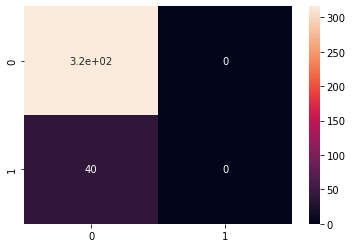

In [88]:
import seaborn as sns
sns.heatmap(confusion, annot=True)

<AxesSubplot:>

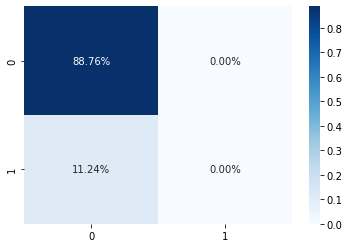

In [89]:
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

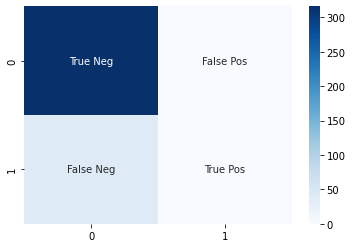

In [90]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')

What are your thoughts on the performance of the model? Write your conclusions below.

#### Your conclusions here:
#### The overall performance of the model is 88%

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [91]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [92]:
# Your code here:

y_pred_knn = knn.predict(X_test)

confusion_knn = confusion_matrix(y_test, y_pred_knn)

print ('Confusion matrix\n', confusion_knn)
print ('\nAccuracy score: {:.4f}\n'.format(accuracy_score(y_test, y_pred_knn)))

Confusion matrix
 [[309   7]
 [ 17  23]]

Accuracy score: 0.9326



#### Your conclusions here:
#### The overall performance of the model is 93%

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [93]:
# Your code here:

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

confusion_knn = confusion_matrix(y_test, y_pred_knn)
print ('Confusion matrix\n', confusion_knn)
print ('\nAccuracy score: {:.4f}\n'.format(accuracy_score(y_test, y_pred_knn)))

Confusion matrix
 [[310   6]
 [ 19  21]]

Accuracy score: 0.9298



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

#### Your conclusions here:
#### The accuracy is quite similar

#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [95]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth = 5, random_state = 1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [96]:
prediction=tree.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [97]:
y_pred = tree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       316
           1       0.77      0.60      0.68        40

    accuracy                           0.94       356
   macro avg       0.86      0.79      0.82       356
weighted avg       0.93      0.94      0.93       356




Accuracy score: 0.9354



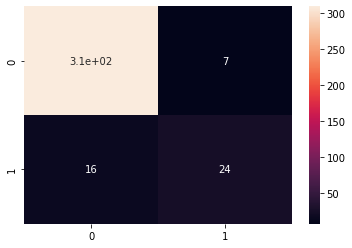

In [98]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print('\nAccuracy score: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

#### The accuracy for the decision tree is 93.5

### Random Tree

In [99]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

The accuracy of the Random Forest Classifier is: 94.66292134831461 %



Accuracy score: 0.9466



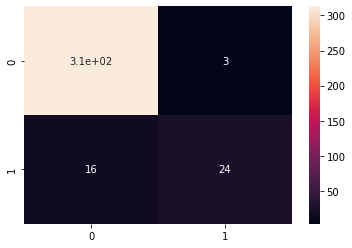

In [100]:
cm_RF = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_RF, annot=True)
print('\nAccuracy score: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

#### The accuracy for random forest: 94.6

## SVM

In [103]:
#SVM
from sklearn import svm
clf = svm.SVC(gamma='auto').fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_clf = clf.score(X_test, y_test)
print('The accuracy of the SVM is:', acc_clf * 100, '%')

The accuracy of the SVM is: 91.29213483146067 %



Accuracy score: 0.9129



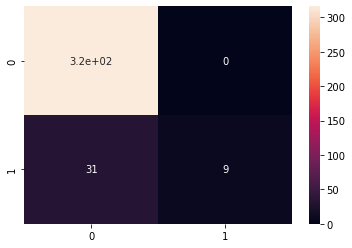

In [104]:
cm_SVM = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_SVM, annot=True)
print('\nAccuracy score: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [86]:
# Your code here
from sklearn.preprocessing import RobustScaler

X_s_train = RobustScaler().fit_transform(X_train)
X_s_test = RobustScaler().fit_transform(X_test)

logreg_s = LogisticRegression()
logreg_s.fit(X_s_train, y_train)
y_pred_s = logreg.predict(X_s_test)

confusion_s = confusion_matrix(y_test, y_pred_s)
print ('Confusion matrix\n', confusion_s)
print ('\nAccuracy score :{:.4f}\n'.format(accuracy_score(y_test, y_pred_s)))

Confusion matrix
 [[196 124]
 [ 14  22]]

Accuracy score :0.6124



In [87]:
# No, the accuracy is worse. 